In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data

In [3]:
x_train,y_train=load_data('train_data.pkl')
x_test1,y_test1,test1_star=load_data('test1_data.pkl')
x_test2,y_test2,test2_lab=load_data('test2_data.pkl')

### NO AF

In [6]:
x_train = x_train.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_test1 = x_test1.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 
x_test2 = x_test2.drop(['gnomad_genome_controls_AF_popmax'], axis=1) 

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
def test_test2_auc(rfc,x_train, y_train,x_test,y_test,x_test2,y_test2):
    x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123)
    rfc.fit(x_tra, y_tra)
    y_val_pred_prob=rfc.predict_proba(x_val)[:,1]
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
    val_auc= auc(fpr, tpr)
#     print('val auc ',val_auc)
    rfc.fit(x_train, y_train)
    y_test_pred_prob=rfc.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
    test1_auc=auc(fpr, tpr)
#     print('test1 auc ',test1_auc)
    y_test2_pred_prob=rfc.predict_proba(x_test2)[:,1]
    fpr2, tpr2, _ = roc_curve(y_test2, y_test2_pred_prob)
    test2_auc=auc(fpr2, tpr2)
#     print('test2 auc ',test2_auc)
    return val_auc,test1_auc,test2_auc
    
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123)
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9933320516964763, 0.9911623090348611, 0.9444471928725979)

In [9]:
#loss loss{‘deviance’, ‘exponential’}, default=’deviance’
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=123,loss='exponential')
test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)

(0.9939993814035009, 0.9890890424543272, 0.9348651545137925)

In [17]:
loss='exponential'
#learning_ratefloat, default=0.1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.2,0.3,0.4]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,
                                    learning_rate=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.0001 (0.9789344119754495, 0.9684090223944877, 0.14329174519504947)
0.001 (0.9789344119754495, 0.9684090223944877, 0.14329174519504947)
0.01 (0.9886862214477277, 0.9901014608549797, 0.8898815444755633)
0.2 (0.9945366353053229, 0.9886108957795005, 0.9412909713812194)
0.3 (0.9947653661411697, 0.9878105563488826, 0.9160341089948899)
0.4 (0.9951053875000614, 0.9881632836937304, 0.930101440193316)


In [18]:

#learning_ratefloat, default=0.1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.5,0.6,0.7,0.8,0.9]:
    
    clf = GradientBoostingClassifier(random_state=123,loss='exponential',
                                    learning_rate=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#0.4 (0.9951053875000614, 0.9881632836937304, 0.930101440193316)

0.5 (0.9946839977044231, 0.9860198898408813, 0.9175466807391408)
0.6 (0.9950978165404022, 0.9865981713812956, 0.9225142713395986)
0.7 (0.9949049250255358, 0.9859575201731721, 0.9130466638277441)
0.8 (0.9949281546935687, 0.9900222046556961, 0.9219248680676193)
0.9 (0.9948159081107716, 0.9878374756335283, 0.9226309482313967)


In [19]:
learning_rate=0.4
#n_estimatorsint, default=100
from sklearn.ensemble import GradientBoostingClassifier
for para in [10,20,40,60,80,100,120,140,160,180,200,300]:
    
    clf = GradientBoostingClassifier(random_state=123,loss=loss,learning_rate=learning_rate,
                                    n_estimators=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)
    
#200 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)

10 (0.9927469172886869, 0.9837269085180653, 0.7906583882640545)
20 (0.9935563381464482, 0.9869136576907386, 0.8155939634770207)
40 (0.9944585226396242, 0.9868820124439004, 0.9128637799930664)
60 (0.9947460899094094, 0.9879407299741603, 0.9197790291167272)
80 (0.9950436828868664, 0.9882854220499571, 0.9179053432731632)
100 (0.9951053875000614, 0.9881632836937304, 0.930101440193316)
120 (0.9951129584597206, 0.9882165811006846, 0.9325069982647028)
140 (0.9953538855172709, 0.9881246231696814, 0.9319331264662415)
160 (0.9953531103336881, 0.9859671279296431, 0.9300942176177291)
180 (0.9953030593136887, 0.9880078001042659, 0.9383903145613701)
200 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
300 (0.9951254389154044, 0.9871879476630853, 0.9269842235461132)


In [20]:
n_estimators=200
#subsamplefloat, default=1.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.2,0.5,0.6,0.7,0.8,0.9]:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,
                                    subsample=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.2 (0.9935694129095456, 0.9893550534929053, 0.9318935050607354)
0.5 (0.994604618905539, 0.9906446405095426, 0.9492252202239633)
0.6 (0.994678338864268, 0.989594102747178, 0.942310455541348)
0.7 (0.9947214907503803, 0.989870186205177, 0.9183769980110319)
0.8 (0.9948866306929807, 0.9887701306722879, 0.9267062865063027)
0.9 (0.9950773775332676, 0.9880865094745908, 0.9347495786243708)


In [21]:
subsample=1
#criterion{‘friedman_mse’, ‘squared_error’, ‘mse’, ‘mae’}, default=’friedman_mse’
from sklearn.ensemble import GradientBoostingClassifier
for para in ['squared_error']:
    clf = GradientBoostingClassifier(random_state=123,
                                     loss=loss,learning_rate=learning_rate,
                                     n_estimators=n_estimators,subsample=subsample,
                                    criterion=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

squared_error (0.9953899057144209, 0.9878842932589872, 0.9385807439323318)


In [24]:
criterion='friedman_mse'
#(0.9953899057144209, 0.9878844972573553, 0.93855434923537)
#min_samples_splitint or float, default=2
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,
            min_samples_split=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)


In [25]:
min_samples_split=2
#max_depthint, default=3
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,5,6,8,10,20,40]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,
            max_depth=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.9944783414998924, 0.986827383380933, 0.9042446636323237)
4 (0.9951529579325958, 0.987255638288227, 0.9295429971081512)
5 (0.9943076460749484, 0.9875987578766038, 0.9136866838489587)
6 (0.9930459831149512, 0.9824163295026972, 0.8396258652997873)
8 (0.9900406738825923, 0.9889707829004035, 0.9037023098618808)
10 (0.9873645075995122, 0.9882949363071762, 0.8558966398934207)
20 (0.9769128107097297, 0.9746897439820481, 0.8059990066903364)
40 (0.9757208367538309, 0.9737602764177886, 0.8557393580339938)


In [26]:
max_depth=3
#min_samples_leafint or float, default=1
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.0001,0.001,0.01,0.1,0.2,0.3,0.4 ,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.0001 (0.9950373522209398, 0.9875896771159164, 0.9426244760990294)
0.001 (0.9950833206074028, 0.9863198269413844, 0.9003929903201046)
0.01 (0.9949471725308012, 0.9861255666621332, 0.7875241134200387)
0.1 (0.9928328076296669, 0.9908992758057935, 0.9389230675910937)
0.2 (0.9838339856503183, 0.9729320118772382, 0.9276626171701408)
0.3 (0.8419406617638889, 0.740243120721701, 0.5443158153970749)
0.4 (0.8263167591331484, 0.7620152715444943, 0.42054651585302494)
0.5 (0.5, 0.5, 0.5)


In [27]:
min_samples_leaf=1
#(0.9953899057144209, 0.9878844972573553, 0.93855434923537)
#min_weight_fraction_leaffloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2,0.5]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,                     
            min_samples_leaf=min_samples_leaf,
            min_weight_fraction_leaf=para)
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9950833206074028, 0.9863198269413844, 0.9003929903201046)
0.01 (0.9949471725308012, 0.9861255666621332, 0.7875241134200387)
0.1 (0.9928328076296669, 0.9908992758057935, 0.9389230675910937)
0.2 (0.9838339856503183, 0.9729320118772382, 0.9276626171701408)
0.5 (0.5, 0.5, 0.5)


In [28]:
min_weight_fraction_leaf=0
#min_impurity_decreasefloat, default=0.0
from sklearn.ensemble import GradientBoostingClassifier
for para in [0.001,0.01,0.1,0.2]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

0.001 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
0.01 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
0.1 (0.9950440446392049, 0.9889005592955257, 0.9412092329648214)
0.2 (0.9951354129441705, 0.9882241658733396, 0.9429437961481475)


In [29]:
min_impurity_decrease=0
#max_features{‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in ['auto','sqrt','log2',2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

auto (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
sqrt (0.994920196142118, 0.9835073694410446, 0.922621097930139)
log2 (0.9944220114928719, 0.9855553033909061, 0.9441797080153441)
2 (0.9946398380796533, 0.9839815098145882, 0.9266136408263661)
4 (0.9944220114928719, 0.9855553033909061, 0.9441797080153441)
6 (0.9951034237016515, 0.986805748220681, 0.9385042169271806)
8 (0.9947102247489764, 0.9860648998141348, 0.9237178577770346)
10 (0.9948922378542299, 0.9876164462350968, 0.9194592393065951)
20 (0.9952968061661203, 0.9869865559408858, 0.9283699744966746)


In [30]:
max_features=None
#(0.9953899057144209, 0.9878844972573553, 0.93855434923537)
#max_leaf_nodesint, default=None
from sklearn.ensemble import GradientBoostingClassifier
for para in [2,4,6,8,10,20]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

2 (0.992848311301324, 0.9891924129606963, 0.9531295654898526)
4 (0.9950528558925967, 0.9871544692642459, 0.9296672488962965)
6 (0.9950380498861644, 0.9865137698898409, 0.9173984124191659)
8 (0.9953899057144209, 0.9878812106169818, 0.93855434923537)
10 (0.9953899057144209, 0.9878812106169818, 0.93855434923537)
20 (0.9953899057144209, 0.9878812106169818, 0.93855434923537)


In [31]:
#
max_leaf_nodes=None
#tolfloat, default=1e-4
from sklearn.ensemble import GradientBoostingClassifier
for para in [1e-6,1e-5,1e-3,1e-2,1e-1]:
    clf = GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=max_leaf_nodes,
            tol=para                        )
    out=test_test2_auc(clf,x_train, y_train,x_test1,y_test1,x_test2,y_test2)
    print(para,out)

#

1e-06 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
1e-05 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
0.001 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
0.01 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)
0.1 (0.9953899057144209, 0.9878844972573553, 0.93855434923537)


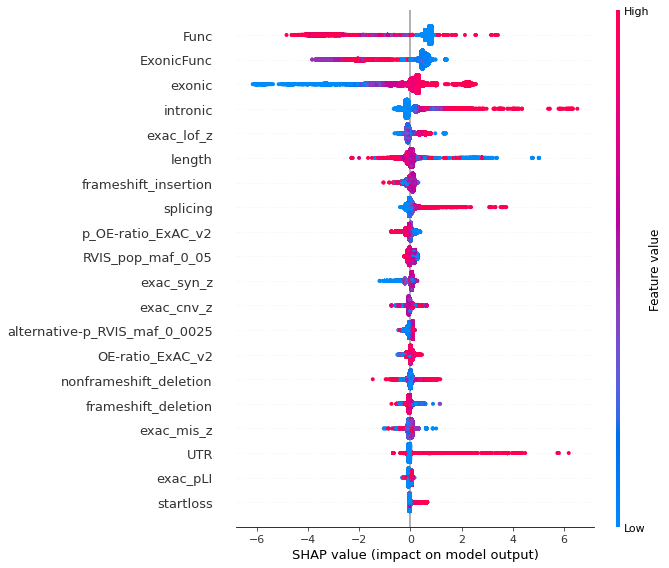

In [32]:
clf=GradientBoostingClassifier(random_state=123,
            loss=loss,learning_rate=learning_rate,n_estimators=n_estimators,subsample=subsample,
            criterion=criterion,min_samples_split=min_samples_split,max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,min_weight_fraction_leaf=min_weight_fraction_leaf,
            min_impurity_decrease=min_impurity_decrease,
            max_features=max_features,                        
            max_leaf_nodes=max_leaf_nodes,                        
            )
import shap
clf.fit(x_train,y_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)
#shap.summary_plot(shap_values, x_train)
shap.summary_plot(shap_values, x_train)

In [33]:
shap_df=pd.DataFrame()
shap_df['feature']=x_train.columns.to_list()
shap_df['importance']=np.mean(np.abs(shap_values),axis=0)
shap_df=shap_df.sort_values(by=['importance'],ascending=False)

In [34]:
shap_df

,feature,importance
0,Func,1.082047
1,ExonicFunc,0.877426
3,exonic,0.778264
6,intronic,0.243126
19,exac_lof_z,0.167066
2,length,0.163494
11,frameshift_insertion,0.104183
8,splicing,0.092875
25,p_OE-ratio_ExAC_v2,0.082165
22,RVIS_pop_maf_0_05,0.080971


In [35]:
##
for num in range(28):
    num_sel=shap_df.iloc[:num+1,0].to_list()
    x_train_num=x_train[num_sel]
    x_test1_num=x_test1[num_sel]
    x_test2_num=x_test2[num_sel]
    out=test_test2_auc(clf,x_train_num, y_train,x_test1_num,y_test1,x_test2_num,y_test2)
    print(num+1,out)

1 (0.8889429105714628, 0.9815206208350333, 0.8570402290413777)
2 (0.9555102503817133, 0.9939405684754522, 0.9497996058235335)
3 (0.9897988941231007, 0.9685964940613807, 0.07474367490282993)
4 (0.9917669302032455, 0.9705782730404824, 0.10411759621410202)
5 (0.9929383876336513, 0.9852154336098644, 0.7855673679572255)
6 (0.9939748856022826, 0.9881707608005803, 0.8324464783660961)
7 (0.9945535601468816, 0.9810518835849315, 0.5554725513942037)
8 (0.9948151329271888, 0.9765742384060928, 0.49765623018195726)
9 (0.9946873309938291, 0.9814640537875697, 0.680922567765375)
10 (0.9943792730380039, 0.9831667629992294, 0.6658096513104923)
11 (0.9944378510774148, 0.9780824521737159, 0.5242236083564847)
12 (0.9945103307424115, 0.9801883613264428, 0.6237265072517008)
13 (0.9943800482215868, 0.9760662144702843, 0.39645366253872005)
14 (0.9943803066161144, 0.9760657158076069, 0.39653839568158095)
15 (0.9949305060837699, 0.9806525737794098, 0.7226482824128053)
16 (0.9948866306929806, 0.9828515628541639, 0

In [42]:
#x_test1[test1_star>=2]
test_test2_auc(clf,x_train, y_train,
               x_test1[test1_star>=2],y_test1[test1_star>=2],
               x_test2[test2_lab.astype('int')>=2],y_test2[test2_lab.astype('int')>=2])

(0.9953899057144209, 0.9938238453276047, 0.932950062483154)